# Graph Theory and Adjacency Matrices

b. Further Exploration: Investigate how eigenvalues and eigenvectors of the adjacency matrix 
can be used to detect clusters in the graph.


Prepared by:  CS103 G1 T2 (2024)

Spectral Clustering uses eigenvalues(spectrum) of the similarity matrix of a data to perform dimensionality reduction before clustering in fewer dimensions


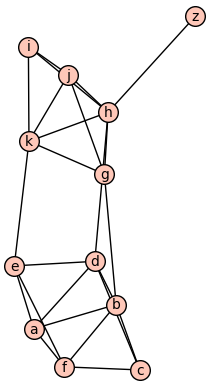

In [28]:
d = {'a':['b','d','e','f'],
     'b':['a','c','d','f','g'],
     'c':['b','f','d'],
     'd':['c','b','a','e','h'],
     'e':['a','f','d','k'],
     'h':['g','k','i','j','z'],
     'g':['h','k'],'i':['h','k','j'],
     'j':['i','k','g','h'],
     'k':['e','h','g','j']}
G = Graph(d)
Graph(G).show()

# The Sparsest Cut Problem:
How can we partition a given graph into two or more large pieces while removing as few edges as possible?


We will investigate how spectral clustering results in a solution to the Sparsest Cut Problem.

In [29]:
A = G.adjacency_matrix()
A

[0 1 0 1 1 1 0 0 0 0 0 0]
[1 0 1 1 0 1 1 0 0 0 0 0]
[0 1 0 1 0 1 0 0 0 0 0 0]
[1 1 1 0 1 0 0 1 0 0 0 0]
[1 0 0 1 0 1 0 0 0 0 1 0]
[1 1 1 0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 1 0 1 1 0]
[0 0 0 1 0 0 1 0 1 1 1 1]
[0 0 0 0 0 0 0 1 0 1 1 0]
[0 0 0 0 0 0 1 1 1 0 1 0]
[0 0 0 0 1 0 1 1 1 1 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0]

In [30]:
# Compute the degree matrix
D = diagonal_matrix([sum(row) for row in A.rows()])
D

[4 0 0 0 0 0 0 0 0 0 0 0]
[0 5 0 0 0 0 0 0 0 0 0 0]
[0 0 3 0 0 0 0 0 0 0 0 0]
[0 0 0 5 0 0 0 0 0 0 0 0]
[0 0 0 0 4 0 0 0 0 0 0 0]
[0 0 0 0 0 4 0 0 0 0 0 0]
[0 0 0 0 0 0 4 0 0 0 0 0]
[0 0 0 0 0 0 0 6 0 0 0 0]
[0 0 0 0 0 0 0 0 3 0 0 0]
[0 0 0 0 0 0 0 0 0 4 0 0]
[0 0 0 0 0 0 0 0 0 0 5 0]
[0 0 0 0 0 0 0 0 0 0 0 1]

The laplacian matrix, is the sum of a its degree matrix (diagonal) and adjacency matrix (symmetric).
This means the laplacian matrix is symmetrical.
So its eigenvectors are orthogonal.

In [53]:
L = D-A
L

[ 4 -1  0 -1 -1 -1  0  0  0  0  0  0]
[-1  5 -1 -1  0 -1 -1  0  0  0  0  0]
[ 0 -1  3 -1  0 -1  0  0  0  0  0  0]
[-1 -1 -1  5 -1  0  0 -1  0  0  0  0]
[-1  0  0 -1  4 -1  0  0  0  0 -1  0]
[-1 -1 -1  0 -1  4  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  4 -1  0 -1 -1  0]
[ 0  0  0 -1  0  0 -1  6 -1 -1 -1 -1]
[ 0  0  0  0  0  0  0 -1  3 -1 -1  0]
[ 0  0  0  0  0  0 -1 -1 -1  4 -1  0]
[ 0  0  0  0 -1  0 -1 -1 -1 -1  5  0]
[ 0  0  0  0  0  0  0 -1  0  0  0  1]

In [32]:
# K-means is a popular algorithim that iteratively computes centroids that minimises the within-cluster variance
# Partitioning

Spectral Clustering (embedding) can be used before k-means to provide insight into the graph's structure before clustering.

When used together, K-means is applied but on an embedding containing information about the graph's connectivity. It minimizes squared errors on the ability to reconstruct neighbors.

In [33]:
# No of nodes in the graph.
n = len(G)

# To print matrices and vectors with lower precision
CC10 = ComplexField(prec = 15)
MatPrint = MatrixSpace(CC10, n, n)
VecPrint = VectorSpace(CC10, n)

In [34]:
# Get the adjacency matrix
show(VecPrint(L.eigenvalues()))

(0.0000, 0.6851, 1.165, 4.335, 5.070, 5.882, 6.262, 6.414, 7.667, 2.877, 3.343, 4.299)

### How does the Laplacian Matrix L show us clustering in a graph?

We care about the smallest non-zero eigenvalue and its corresponding eigenvector. 

It will tell us how to partition the graph!

In [35]:
# Compute eigenmatrix which contains both eignevalues and eigenvectors
# Can retrieve eigenvalues and eigenvectors from eigenmatrix_right
Lambda, S = L.eigenmatrix_right()

print("Eigenvalues: ")
show(MatPrint(Lambda))

print("Eigenvectors: ")
show(MatPrint(S))

Eigenvalues: 


[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.6851 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000  1.165 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000  4.335 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000  5.070 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000  5.882 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  6.262 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  6.414 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  7.667 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  2.877 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  3.343 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  4.299]

Eigenvectors: 


[     1.000      1.000      1.000      1.000      1.000      1.000      1.000      1.000      1.000      1.000      1.000      1.000]
[     1.000     0.8304     0.6733     0.5092    -0.8423    -0.2650     -2.188     -3.734      6.019    -0.4229      8.658     0.8549]
[     1.000      1.127      1.379    -0.1727     0.2919     0.6331  -0.004390      1.010      1.877     -1.727     -9.963    -0.7687]
[     1.000     0.6740     0.6724      2.023     0.2228    -0.8630     0.6693  0.0002940     -10.97    0.04705    -0.5742    -0.5632]
[     1.000     0.7056     0.3052    -0.5655    -0.4659   -0.05758     -2.277      1.034      5.095      1.334     -2.760     -1.297]
[     1.000      1.105      1.184     -2.302    0.01513    -0.6964      1.534     0.2860     -3.815     0.1644     -4.666     0.7069]
[     1.000    -0.3229     -1.653    -0.2100     -1.471     0.1600    -0.4356      2.983     -4.150    -0.3824      28.55     0.2243]
[     1.000    -0.7551    -0.7783     0.5744  0.0005507    -0.5493      2.625     0.6899      15.25   -0.08462      2.114    -0.1835]
[     1.000    -0.8211     -2.921     0.3287     -1.167    0.01257    -0.9730      1.016     -1.971   -0.05214     -29.44     0.7097]
[     1.000    -0.7057     -2.590    -0.4814      3.155    -0.1547     -1.399    -0.3759     -1.154    -0.2078      5.557    0.01724]
[     1.000    -0.4402     -1.991    -0.5319    -0.7393     0.6677      1.948     -3.781     -4.902     0.2860      2.427    -0.7557]
[     1.000     -2.397      4.720    -0.1722 -0.0001353     0.1125    -0.4988    -0.1274     -2.288    0.04507    -0.9023    0.05561]

All graph's spectrum will contain an eigenvalue of zero. We call that λ_1.

λ_1 = 0, and its eigenvector is [1, 1, 1, ... 1]

This is an implication of the Laplacian matrix being symmetrical.



# Eigen vectors as different partitions
Each of these eigenvectors can be seen as different ways of assigning numbers to vertices, s.t. neighboring nodes have similar values. each eigenvector is a suggestion. “different” partition.

# Fiedler Values
The second smallest non-zero eigenvalue (λ_2) has the name "Fiedler Value".
It's corresponding eigenvector minimizes the distance between the connected vertices in the original graph.


In [38]:
eigenvalues = L.eigenvalues()
eigenvalues.sort()
fiedler_value = eigenvalues[1]  # second-smallest eigenvalue
print("Fiedler value:", fiedler_value)

Fiedler value: 0.685030730372358?


Since we have only one zero eigenvalue, we know the graph is connected.
But we can find the bipartion. 

The smaller the λ_2, the better the quality of our partitioning

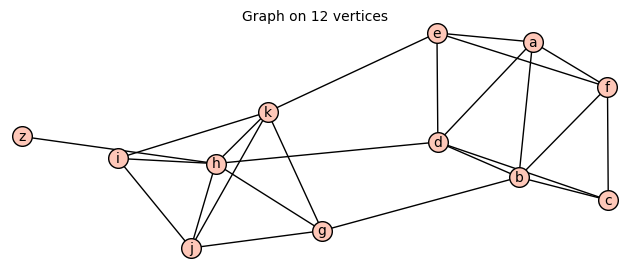

In [14]:
# Look at G, does it feel like the partitioning should split between h and d, e and k, b and g?
G

In [15]:
# Assuming G is defined and the eigenvectors are obtained
eigenvectors = G.eigenvectors(laplacian=true)
eigenvectors.sort()

# Extract the Fiedler vector (second-smallest eigenvalue)
fiedler_vector = eigenvectors[1]  # Change here to get the eigenvector

for value in fiedler_vector:
    print(f"Eigenvector values:{value}") 

Eigenvector values:0.685030730372358?
Eigenvector values:[(1, -0.98878963165168?, -2.88677207249350?, 0.84961004591763?, -0.3888475296620?, 1.2041944685216?, 1.3306817875316?, 1.3573647188813?, -0.53002088702452?, -0.8497522331208?, 0.811575824356?, -0.9092444912548?)]
Eigenvector values:1


In [16]:
eigenvectors = L.eigenvectors_right()
fiedler_vector = eigenvectors[1][1]  # Access the eigenvector part directly
fiedler_vector

[(1, 0.83043065396885?, 1.12719727117479?, 0.6739574425646?, 0.7055422260499?, 1.1050389470443?, -0.32291090835137?, -0.7550644974903?, -0.8211212204502?, -0.7056603026620?, -0.44014559182892?, -2.39726402001977?)]

In [17]:
# Initialize partitions
partition1 = []
partition2 = []

# Access the first tuple in fiedler_vector
fiedler_tuple = fiedler_vector[0]  # This extracts the tuple

# Partition the nodes based on the sign of entries in the Fiedler vector
for value in fiedler_tuple:
    if value >= 0:
        partition1.append(value)  # Add to partition1 if value is non-negative
    else:
        partition2.append(value)  # Add to partition2 if value is negative

Partition1 = [float(x) for x in partition1]
Partition2 = [float(x) for x in partition2]


print("Partition 1:", partition1)
print("Partition 2:", partition2)


Partition 1: [1, 0.83043065396885?, 1.12719727117479?, 0.6739574425646?, 0.7055422260499?, 1.1050389470443?]
Partition 2: [-0.32291090835137?, -0.7550644974903?, -0.8211212204502?, -0.7056603026620?, -0.44014559182892?, -2.39726402001977?]


The one partition contains all the positive elements, the other contain the negative elements
In theory their sum should equal zero. "Balancing the nodes"

In [18]:
sum_p1 = 0
sum_p2 = 0
for value in partition1:
    sum_p1 += value
for value in partition2:
    sum_p2 += value

result = sum_p1 + sum_p2
print("Sum of partition1: ",sum_p1)
print("Sum of partition2: ",sum_p2)
print("Sum of the two partitions: ",result)

Sum of partition1:  5.44216654080243?
Sum of partition2:  -5.44216654080243?
Sum of the two partitions:  0


They can be visualised as assigning values to the nodes on the graph.
s.t. the split occurs on the 0 of the number line.

By mapping the values of the eigenvector to the nodes and plotting it on a number line. We have reduced the problem to a lower dimension. Now the positive and negative valued nodes are separated and a solution to the Sparsest Cut Problem has emerged.


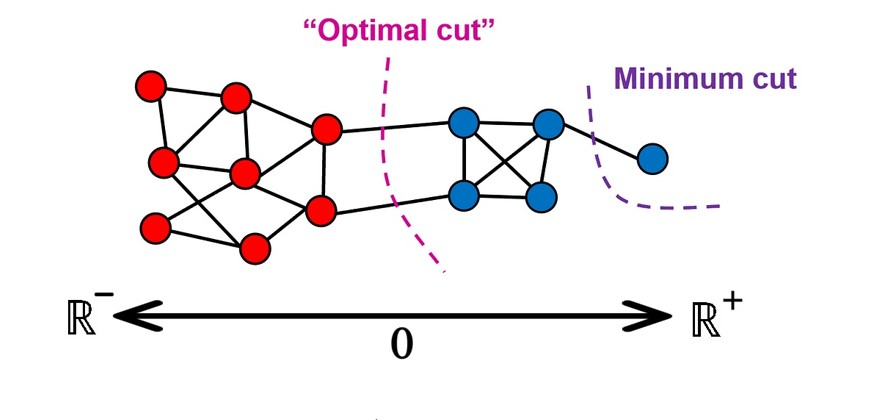


Even though we have computed eigenvalues and vectors, why does it lead us to the best partition for a graph?

$$\lambda_2=\underset{x}{\min}\frac{(x^TLx)}{(x^Tx)}$$
where $L$ is the Laplacian matrix, $x$ is the eigenvector


the numerator part can be simplified to a sum of distances between nodes.
$$x^TLx=\sum_{i,j=1}^{n}L_{ij}x_ix_j$$
$$= \sum_{i,j=1}(D_{ij}-A_{ij}x_ix_j)$$
$$= \sum_{i} D_{ii}x_{i}^{2}-\sum_{(i,j)\in E}2x_ix_j$$
$$\sum_{(i,j)\in E}(x_i-x_j)^2$$

The Laplacian matrix $L$ is substituted to $D - A$
where $D$ is the degree matrix and $A$ is the adjacency matrix.

The formula simplifies into a summation of squared distances between nodes.

and the denominator turns out to be just 1. As the eigenvector of $\lambda_2$ is normalised to unit length and is orthogonal to the 1st eigenvector.

$$\sum_{i}x^2=1$$


When computing the eigenvalues, we were actually performing K-means on a spectral embedding!!

# Case of disconnected graph

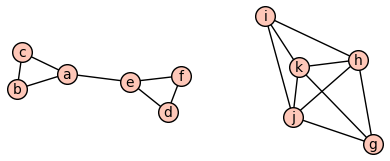

In [46]:
d_2 = {'a':['b','c'],'b':['a','c',],'c':[],'d':['e','f'],'e':['a','f','d'],'h':['g','k','i','j'],'g':['h','k'],'i':['h','k','j'],'j':['i','k','g','h'],'k':['h','g','j']}
G = Graph(d_2)
Graph(G).show()

In [20]:
A = G.adjacency_matrix()
A

[0 1 1 0 1 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 1 0 0 0 0 0]
[1 0 0 1 0 1 0 0 0 0 0]
[0 0 0 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 1 1]
[0 0 0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 0 0 1 0 1 1]
[0 0 0 0 0 0 1 1 1 0 1]
[0 0 0 0 0 0 1 1 1 1 0]

In [67]:
# Compute the degree matrix
D = diagonal_matrix([sum(row) for row in A.rows()])
D

[3 0 0 0 0 0 0 0 0 0 0]
[0 2 0 0 0 0 0 0 0 0 0]
[0 0 2 0 0 0 0 0 0 0 0]
[0 0 0 2 0 0 0 0 0 0 0]
[0 0 0 0 3 0 0 0 0 0 0]
[0 0 0 0 0 2 0 0 0 0 0]
[0 0 0 0 0 0 3 0 0 0 0]
[0 0 0 0 0 0 0 4 0 0 0]
[0 0 0 0 0 0 0 0 3 0 0]
[0 0 0 0 0 0 0 0 0 4 0]
[0 0 0 0 0 0 0 0 0 0 4]

In [69]:
L= D-A
L

[ 3 -1 -1  0 -1  0  0  0  0  0  0]
[-1  2 -1  0  0  0  0  0  0  0  0]
[-1 -1  2  0  0  0  0  0  0  0  0]
[ 0  0  0  2 -1 -1  0  0  0  0  0]
[-1  0  0 -1  3 -1  0  0  0  0  0]
[ 0  0  0 -1 -1  2  0  0  0  0  0]
[ 0  0  0  0  0  0  3 -1  0 -1 -1]
[ 0  0  0  0  0  0 -1  4 -1 -1 -1]
[ 0  0  0  0  0  0  0 -1  3 -1 -1]
[ 0  0  0  0  0  0 -1 -1 -1  4 -1]
[ 0  0  0  0  0  0 -1 -1 -1 -1  4]

In [70]:
eigen_values = L.eigenvalues()
eigen_values.sort()
for i, eigen_value in enumerate(eigen_values):
    print(f"Eigenvalue {i+1}: {eigen_value}")

Eigenvalue 1: 0
Eigenvalue 2: 0
Eigenvalue 3: 0.4384471871911698?
Eigenvalue 4: 3
Eigenvalue 5: 3
Eigenvalue 6: 3
Eigenvalue 7: 3
Eigenvalue 8: 4.561552812808830?
Eigenvalue 9: 5
Eigenvalue 10: 5
Eigenvalue 11: 5


Since this matrix has two zero eigenvalues
We know there is two connected components (subgraphs) in this graph

⇒ graph splits naturally into two clusters.

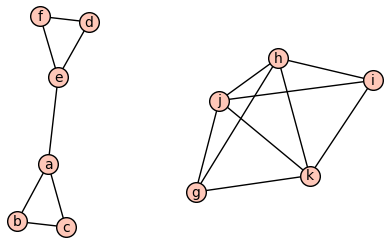

In [72]:
Graph(G).show()

In [75]:
# No of nodes in the graph.
n = len(G)

# To print matrices and vectors with lower precision
CC10 = ComplexField(prec = 15)
MatPrint = MatrixSpace(CC10, n, n)
VecPrint = VectorSpace(CC10, n)

In [76]:
# Compute eigenmatrix which contains both eignevalues and eigenvectors
# Can retrieve eigenvalues and eigenvectors from eigenmatrix_right
Lambda, S = L.eigenmatrix_right()

print("Eigenvalues: ")
show(MatPrint(Lambda))

print("Eigenvectors: ")
show(MatPrint(S))

Eigenvalues: 


[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000  5.000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000  5.000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000  5.000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000  3.000 0.0000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  3.000 0.0000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  3.000 0.0000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  3.000 0.0000 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.4384 0.0000]
[0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000  4.562]

Eigenvectors: 


[  1.000  0.0000  0.0000  0.0000  0.0000   1.000  0.0000  0.0000  0.0000   1.000   1.000]
[  1.000  0.0000  0.0000  0.0000  0.0000  0.0000   1.000  0.0000  0.0000   1.781 -0.2808]
[  1.000  0.0000  0.0000  0.0000  0.0000  -1.000  -1.000  0.0000  0.0000   1.781 -0.2808]
[  1.000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   1.000  0.0000  -1.781  0.2808]
[  1.000  0.0000  0.0000  0.0000  0.0000   1.000  0.0000  0.0000  0.0000  -1.000  -1.000]
[  1.000  0.0000  0.0000  0.0000  0.0000  -1.000  0.0000  -1.000  0.0000  -1.781  0.2808]
[ 0.0000   1.000   1.000  0.0000  0.0000  0.0000  0.0000  0.0000   1.000  0.0000  0.0000]
[ 0.0000   1.000  0.0000   1.000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
[ 0.0000   1.000   1.000  0.0000  0.0000  0.0000  0.0000  0.0000  -1.000  0.0000  0.0000]
[ 0.0000   1.000  0.0000  0.0000   1.000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]
[ 0.0000   1.000  -2.000  -1.000  -1.000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000]

In a disconnected graph the eigenvalue zero, has a multiplicity of ≥ 2.
The multiplicity tells us the number of disconnected subgraphs.

The fiedler values and its vector partitions one of the subgraphs.